## Quantum Circuits on both Simulators and IBM Quantum Computer

In this notebook, we are going to learn how to use Qiskit to define a simple circuit and to execute it on both simulators and the quantum computers of the IBM Quantum Experience.. 

We start by importing the necessary packages.

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
from qiskit.quantum_info import Statevector

## Defining the circuit

We are going to define a very simple circuit: we will use the $H$ gate to put a qubit in superposition and then we will measure it

c:\Users\sarar\anaconda3\envs\quantis\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


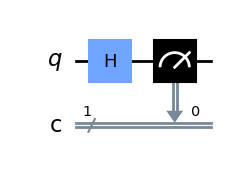

In [2]:
# Let's create a circuit to put a state in superposition and measure it

circ = QuantumCircuit(1,1) # We use one qubit and also one classical bit for the measure result 

circ.h(0) #We apply the H gate

circ.measure(range(1),range(1)) # We measure

circ.draw(output='mpl') #We draw the circuit

## Running the circuit on simulators

Once that we have defined the circuit, we can execute it on a simulator. 

{'0': 504, '1': 520}


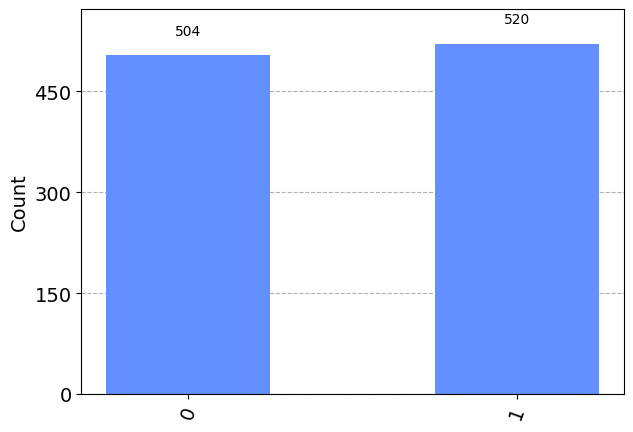

In [3]:
# Executing on the local simulator

backend_sim = Aer.get_backend('qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)



We can also run the circuit run the circuit with a simulator that computes the final state. For that, we need to create a circuit with no measures 

In [4]:
# Execution to the get the statevector

circ2 = QuantumCircuit(1,1)

circ2.h(0)

backend = Aer.get_backend('statevector_simulator') # We change the backend

job = execute(circ2, backend) # We execute the circuit with the new simulator. Now, we do not need repetitions

result = job.result() # We collect the results and access the stavector 
outputstate = result.get_statevector(circ2)
print(outputstate)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Finally, we can also obtain the unitary matrix that represents the action of the circuit

In [5]:
backend = Aer.get_backend('unitary_simulator') # We change the backend again

job = execute(circ2, backend) # We execute the circuit

result = job.result() # We collect the results and obtain the matrix
unitary = result.get_unitary()
print(unitary)


Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


## Running the circuit on Quantum Computer

Now, we are going to use the quantum computers at the IBM Quantum Experience to use our circuit 

One you have created an IBMid account here: https://quantum-computing.ibm.com/

...in the below code, you will need to replace MY API TOKEN with the API number you have save into your clipboard.
Alternatively, you can load the account (if you have saved the Token in a file).

For more details, you can read here: https://github.com/Qiskit/qiskit-ibmq-provider

In [6]:
# Connecting to the real quantum computers
provider = IBMQ.enable_account('8311e0bb192a1f84a8532dbba01441208217aad01fae804106b3c304178e696dcde0c286c3f9ab7223de54e09d0b19ae20097de42faf0357dd236dfa56dff500')
provider.backends() # We retrieve the backends to check their status

for b in provider.backends():
    print(b.status().to_dict())

C:\Users\sarar\AppData\Local\Temp\ipykernel_14332\2735675194.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.enable_account('8311e0bb192a1f84a8532dbba01441208217aad01fae804106b3c304178e696dcde0c286c3f9ab7223de54e09d0b19ae20097de42faf0357dd236dfa56dff500')
C:\Users\sarar\AppData\Local\Temp\ipykernel_14332\2735675194.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provid

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_mps', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_extended_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibm_brisbane', 'backend_version': '1.1.16', 'operational': True, 'pending_jobs': 17, 'status_msg': 'active'}
{'backend_name': 'ibm_kyoto', 'backend_version': '1.2.6', 'operational': True, 'pending_jobs': 1, 'status_msg': 'active'}
{'backend_name': 'ibm_osaka', 'backend_version': '1.0.4', 'operational': T

We can execute the circuit on IBM's quantum simulator (supports up to 32 qubits). We only need to select the appropriate backend.

{'0': 536, '1': 488}


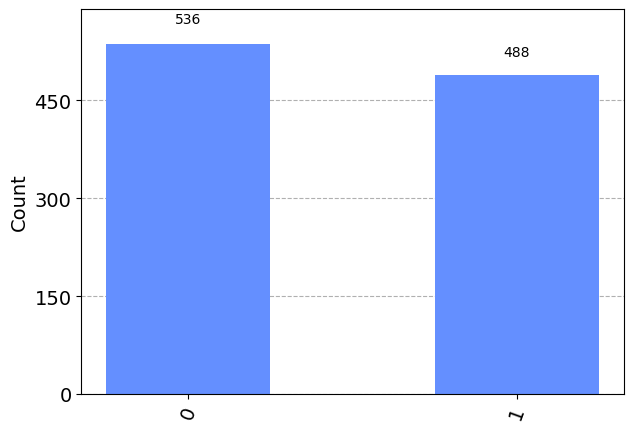

In [7]:
# Executing on the IBM Q Experience simulator

backend_sim = provider.get_backend('ibmq_qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

To execute on one of the real quantum computers, we only need to select it as backend. We will use *job_monitor* to have live information on the job status 

In [8]:
# check which are the available backends
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
# Executing on the quantum computer

# backend = provider.get_backend('ibmq_armonk')
backend = provider.get_backend('ibm_osaka')
job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


When the job is done, we can collect the results and compare them to the ones obtaine with the simulator

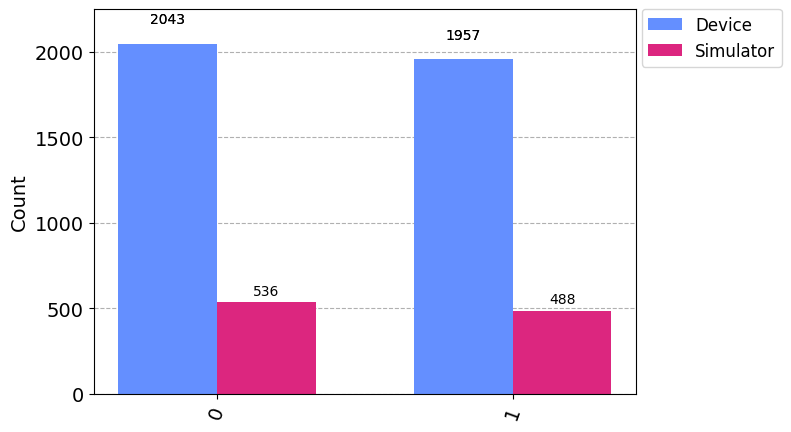

In [10]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

## EXERCISE TO DO

Based on the above notebook, execute both in a simulator and an IBM Quantum Computer the following circuit:

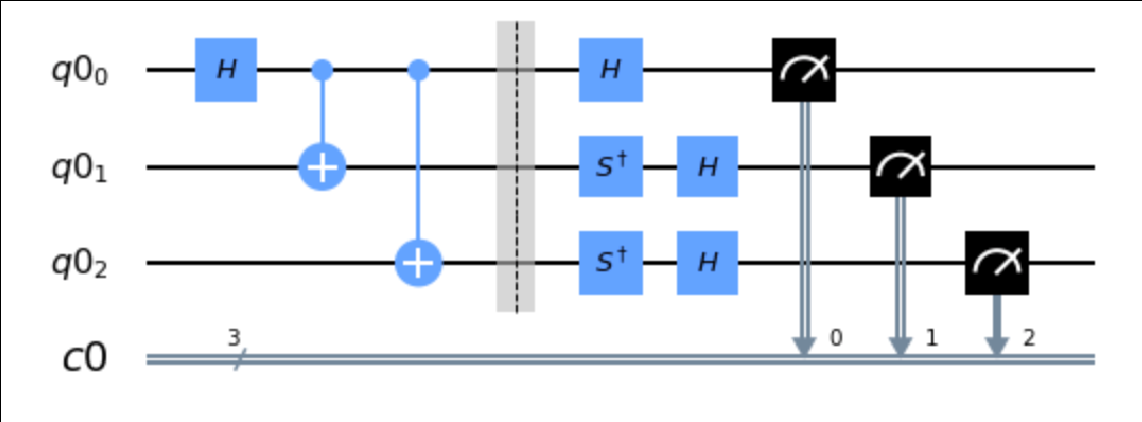

Comment on the final result (state) and provide your interpretation what this quantum circuit is doing.


c:\Users\sarar\anaconda3\envs\quantis\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


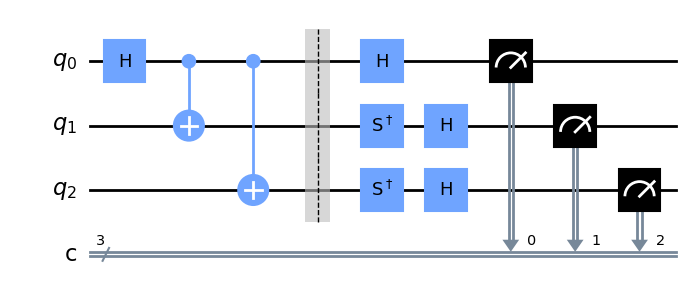

In [11]:
circ = QuantumCircuit(3, 3) # We use 3 qbits and also 3 classical bits for the measure result 

circ.h(0)       # H gate to the 0th qbit
circ.cx(0,1)    # Apply CNOT between qbits 0 and 1
circ.cx(0,2)    # Apply CNOT between qbits 0 and 2
circ.barrier()
circ.h(0)       # Apply again H gate to the 0th qbit
circ.sdg(1)     # Apply S dagger gate to the 1st qbit
circ.sdg(2)     # Apply S dagger gate to the 2nd qbit
circ.h(1)       # Apply H gate to the 1st qbit
circ.h(2)       # Apply H gate to the 2nd qbit
circ.measure(range(3), range(3)) # Measure the 3 qbits to 3 classical bits

circ.draw(output='mpl') #We draw the circuit

Execute on IBM Q experience simulator

{'010': 264, '111': 276, '100': 237, '001': 247}


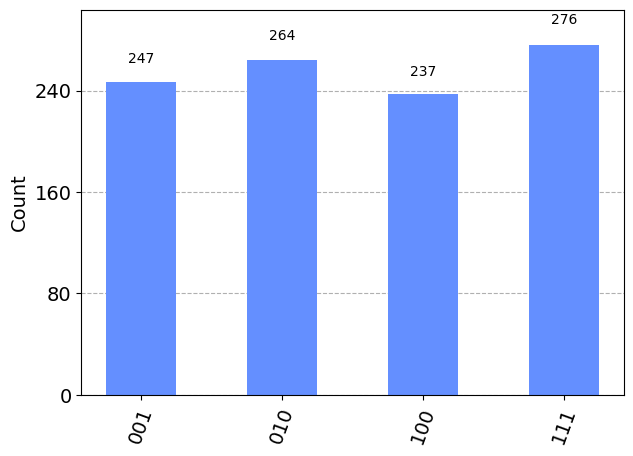

In [12]:
backend_sim = provider.get_backend('ibmq_qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

Execute on the IBM Quantum Computer

In [13]:
backend = provider.get_backend('ibm_osaka')

job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


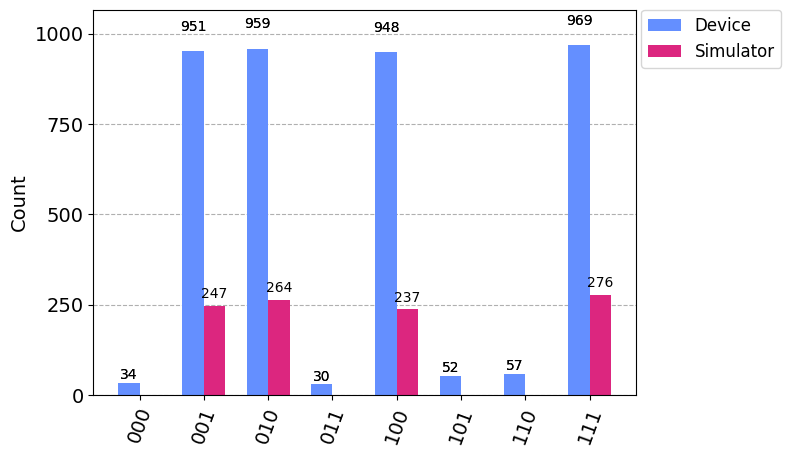

In [14]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

Circuit and interpretation

At first we initialize the circuit starting with 3 qubits and 3 classical bits. We apply the Hadamard gate on the first qubit, placing it in a superposition of its basis states.

Then a CNOT gate is used, having as control qubit the first one and target qubit the second. This creates an entangled pair between the first and second qubits, placing them in a Bell state.

We use again another CNOT, always taking as control the first qubit but as target the third one. In this way, the three qubits are in GHZ state. Until now, our circuit is the same as the one in section 4.2 of notebook 1.

We apply a Hadamard gate to the first qubit, and S-dagger gate followed by Hadamard on the second and third qubits (so the measurement will be performed in the Hadamard basis).

At the end we perform the measurement and store the results of each qubit in the corresponding classical bits.

Doing some researches online, I saw that this could be seen as a version of the Quantum GHZ game. In fact, we have both the entanglement creation and the measurement in the Hadamard basis, used to create a specific state that, when measured, can demonstrate quantum correlations. The goal is to achieve specific measurement outcomes that demonstrate quantum correlations inherent in entangled states. The key to do this is to measure the outcomes, as we do, in the Hadamard basis.